### Comparing naive and trained models

- Fitting a single test image using either a naive model (mechanistic model with gaussian PSF), or a model with trained cytoplasmic and membrane signal profiles as outlined in the paper
- What we see is that the naive model underfits the data, whereas the trained model is able to account for much more of the complexity in the original image
- Quantifying this by RMSE

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import erf

from src import ImageQuant2, load_image, nb_setup, raw_data_path, straighten

nb_setup()
os.makedirs("Figs", exist_ok=True)

%matplotlib inline

In [2]:
# Default model
thickness = 50
sigma = 1.5
membg0 = np.exp(-((np.arange(thickness) - thickness / 2) ** 2) / (2 * sigma**2))
cytbg0 = (1 + erf((np.arange(thickness) - thickness / 2) / sigma)) / 2
cal0 = np.loadtxt("../../../data/calibration_constants.txt")[0]

# Learnt model
membg1 = np.loadtxt("../../../data/calibration_mem6.txt")
cytbg1 = np.loadtxt("../../../data/calibration_cyt.txt")
cal1 = np.loadtxt("../../../data/calibration_constants.txt")[6]

noise = 700

### Straightened image

In [3]:
df = pd.read_csv("../../../data/par2_nebd_embryos.csv")
df["Path"] = df["Path"].apply(lambda x: raw_data_path + x)
path = df[df.Line == "nwg338"].Path.iloc[0]

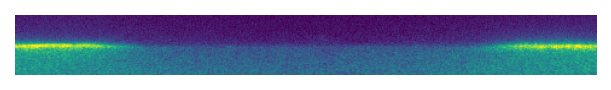

In [4]:
img = load_image(path + "/af_corrected.tif")
roi = np.loadtxt(path + "/ROI_fit.txt")
straight = straighten(img, roi, 50)

fig, ax = plt.subplots()
vmax = np.percentile(straight, 99.9)
ax.imshow(straight, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/truth.png", dpi=600, transparent=True)
fig.savefig("Figs/truth.pdf", transparent=True)

### Quantification 0

In [5]:
iq0 = ImageQuant2(img=img, roi=roi, cytbg=cytbg0, membg=membg0, pooling_rate=1)
iq0.quantify()
iq0.mems[0] *= cal0

  0%|                                                                                                                                             | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                    | 1/600 [00:00<04:25,  2.26it/s]

  6%|███████▎                                                                                                                            | 33/600 [00:00<00:07, 79.49it/s]

 11%|██████████████▏                                                                                                                    | 65/600 [00:00<00:03, 140.70it/s]

 16%|█████████████████████▏                                                                                                             | 97/600 [00:00<00:02, 188.04it/s]

 22%|████████████████████████████▏                                                                                                     | 130/600 [00:00<00:02, 226.40it/s]

 27%|███████████████████████████████████                                                                                               | 162/600 [00:00<00:01, 252.28it/s]

 32%|█████████████████████████████████████████▊                                                                                        | 193/600 [00:01<00:01, 259.03it/s]

 38%|████████████████████████████████████████████████▊                                                                                 | 225/600 [00:01<00:01, 274.98it/s]

 43%|███████████████████████████████████████████████████████▋                                                                          | 257/600 [00:01<00:01, 287.49it/s]

 48%|██████████████████████████████████████████████████████████████▌                                                                   | 289/600 [00:01<00:01, 295.38it/s]

 54%|█████████████████████████████████████████████████████████████████████▊                                                            | 322/600 [00:01<00:00, 302.87it/s]

 59%|████████████████████████████████████████████████████████████████████████████▉                                                     | 355/600 [00:01<00:00, 308.60it/s]

 64%|███████████████████████████████████████████████████████████████████████████████████▊                                              | 387/600 [00:01<00:00, 310.64it/s]

 70%|███████████████████████████████████████████████████████████████████████████████████████████                                       | 420/600 [00:01<00:00, 314.51it/s]

 75%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                | 452/600 [00:01<00:00, 311.01it/s]

 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 484/600 [00:01<00:00, 312.48it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                  | 516/600 [00:02<00:00, 308.74it/s]

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 548/600 [00:02<00:00, 309.51it/s]

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉    | 581/600 [00:02<00:00, 314.79it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 255.08it/s]

### Quantification 1

In [6]:
iq1 = ImageQuant2(img=img, roi=roi, cytbg=cytbg1, membg=membg1, pooling_rate=1)
iq1.quantify()
iq1.mems[0] *= cal1

  0%|                                                                                                                                             | 0/600 [00:00<?, ?it/s]

  0%|▏                                                                                                                                    | 1/600 [00:00<01:38,  6.10it/s]

  5%|██████▌                                                                                                                            | 30/600 [00:00<00:04, 136.57it/s]

 10%|█████████████▊                                                                                                                     | 63/600 [00:00<00:02, 211.06it/s]

 16%|████████████████████▌                                                                                                              | 94/600 [00:00<00:02, 246.52it/s]

 21%|███████████████████████████▎                                                                                                      | 126/600 [00:00<00:01, 269.73it/s]

 26%|██████████████████████████████████▏                                                                                               | 158/600 [00:00<00:01, 285.39it/s]

 32%|█████████████████████████████████████████▍                                                                                        | 191/600 [00:00<00:01, 297.11it/s]

 37%|████████████████████████████████████████████████▎                                                                                 | 223/600 [00:00<00:01, 303.85it/s]

 43%|███████████████████████████████████████████████████████▍                                                                          | 256/600 [00:00<00:01, 310.36it/s]

 48%|██████████████████████████████████████████████████████████████▍                                                                   | 288/600 [00:01<00:00, 312.57it/s]

 53%|█████████████████████████████████████████████████████████████████████▎                                                            | 320/600 [00:01<00:00, 291.71it/s]

 58%|███████████████████████████████████████████████████████████████████████████▊                                                      | 350/600 [00:01<00:00, 290.90it/s]

 64%|██████████████████████████████████████████████████████████████████████████████████▉                                               | 383/600 [00:01<00:00, 300.11it/s]

 69%|█████████████████████████████████████████████████████████████████████████████████████████▋                                        | 414/600 [00:01<00:00, 296.82it/s]

 74%|████████████████████████████████████████████████████████████████████████████████████████████████▊                                 | 447/600 [00:01<00:00, 305.01it/s]

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 479/600 [00:01<00:00, 308.32it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 510/600 [00:01<00:00, 298.48it/s]

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 541/600 [00:01<00:00, 301.02it/s]

 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 573/600 [00:02<00:00, 304.09it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:02<00:00, 283.11it/s]

### Figure: membrane concentration

In [7]:
# fig, ax = plt.subplots()
# ax.plot(iq0.mems[0])
# ax.plot(iq1.mems[0])
# ax.set_ylabel('Concentration\n(a.u.)')
# ax.set_xticks([0, len(iq0.mems[0])])
# ax.set_xticklabels(['0', 'p'])
# ax.set_yticks([])
# ax.set_ylim(bottom=0)
# ax.tick_params(axis='both', labelsize=8)
# # fig.set_size_inches(1.5,1.5)
# # ax.set_ylim(bottom=0)
# # fig.subplots_adjust(left=0.25, bottom=0.25)

### Simulation 0

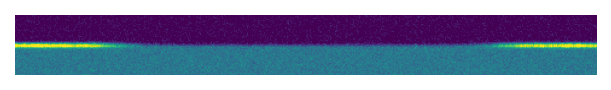

In [8]:
fig, ax = plt.subplots()
sim0 = iq0.straight_images_sim[0] + np.random.normal(
    scale=noise, size=iq0.straight_images_sim[0].shape
)
ax.imshow(sim0, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/model0.png", dpi=600, transparent=True)
fig.savefig("Figs/model0.pdf", transparent=True)

### Simulation 1

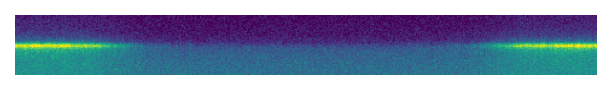

In [9]:
fig, ax = plt.subplots()
sim1 = iq1.straight_images_sim[0] + np.random.normal(
    scale=noise, size=iq1.straight_images_sim[0].shape
)
ax.imshow(sim1, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(5, 1)
fig.savefig("Figs/model1.png", dpi=600, transparent=True)
fig.savefig("Figs/model1.pdf", transparent=True)

### Patches

In [10]:
patch = (50, 120)
zT = straight[:, patch[0] : patch[1]]

z0_noise = sim0[:, patch[0] : patch[1]]
z1_noise = sim1[:, patch[0] : patch[1]]

z0 = iq0.straight_images_sim[0][:, patch[0] : patch[1]]
z1 = iq1.straight_images_sim[0][:, patch[0] : patch[1]]

In [11]:
### Metrics
norm = np.percentile(zT, 99.9)

rmse0 = np.sqrt(np.mean((zT / norm - z0 / norm) ** 2))
rmse1 = np.sqrt(np.mean((zT / norm - z1 / norm) ** 2))

print(rmse0)
print(rmse1)

0.10955542
0.048855368


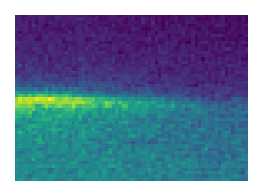

In [12]:
fig, ax = plt.subplots()
ax.imshow(zT, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
fig.set_size_inches(2, 2)
fig.savefig("Figs/truth_zoom.png", dpi=600, transparent=True)
fig.savefig("Figs/truth_zoom.pdf", transparent=True)

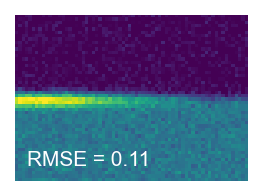

In [13]:
fig, ax = plt.subplots()
ax.imshow(z0_noise, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
ax.text(s="RMSE = %.2f" % rmse0, x=3, y=45, color="w", fontsize=10)
fig.set_size_inches(2, 2)
fig.savefig("Figs/model0_zoom.png", dpi=600, transparent=True)
fig.savefig("Figs/model0_zoom.pdf", transparent=True)

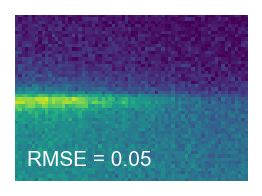

In [14]:
fig, ax = plt.subplots()
ax.imshow(z1_noise, vmin=0, vmax=vmax, cmap="viridis")
ax.axis("off")
ax.text(s="RMSE = %.2f" % rmse1, x=3, y=45, color="w", fontsize=10)
fig.set_size_inches(2, 2)
fig.savefig("Figs/model1_zoom.png", dpi=600, transparent=True)
fig.savefig("Figs/model1_zoom.pdf", transparent=True)